In [852]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms as T
import matplotlib.pyplot as plt
import numpy as np

from collections import OrderedDict

from pathlib import Path
from PIL import Image

torch.manual_seed(42)

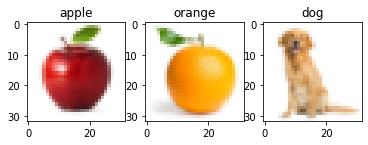

In [853]:
equalize = T.Compose([
    T.Resize(32),
    T.CenterCrop(32),
])

image_names = ["apple", "orange", "dog"]
images = map(lambda image_name: Image.open(f"{image_name}.jpg").convert("RGB"), image_names)
images = dict(zip(image_names, map(equalize, images)))

for i, (name, image) in enumerate(images.items(), start=1):
    plt.subplot(1,len(images),i)
    plt.title(name)
    plt.imshow(image)
plt.show()

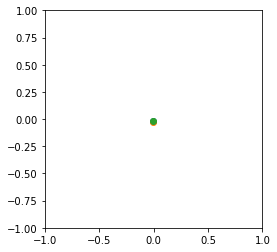

In [854]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d( 3, 64, 5)
        self.conv2 = nn.Conv2d(64, 64, 5)
        self.conv3 = nn.Conv2d(64, 64, 5)
        self.conv4 = nn.Conv2d(64, 64, 5)
        self.conv5 = nn.Conv2d(64, 64, 5)
        self.conv6 = nn.Conv2d(64, 64, 5)
        self.fc1 = nn.Linear(64*8*8, 2)
        self.fc2 = nn.Linear(2, 3)
    
    def forward(self, x):
        x = F.tanh(self.conv1(x))
        x = F.tanh(self.conv2(x))
        x = F.tanh(self.conv3(x))
        x = F.tanh(self.conv4(x))
        x = F.tanh(self.conv5(x))
        x = F.tanh(self.conv6(x)).ravel()
        x = F.tanh(self.fc1(x))
        self.dim2 = x
        x = self.fc2(x)

        return x

model = ConvNet()

for i, (name, image) in enumerate(images.items(), start=1):
    y = model(T.ToTensor()(image))
    plt.scatter(*model.dim2.detach().ravel(), label=name)

plt.axis("square")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

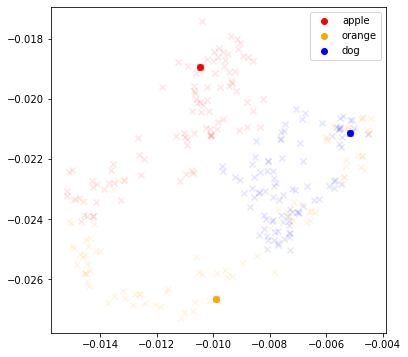

In [858]:
model.eval()
plt.figure(figsize=(6,6))
for i, (name, image) in enumerate(images.items(), start=1):
    y = model(T.ToTensor()(image))
    plt.scatter(*model.dim2.detach().ravel(), label=name, c={"apple": "red", "orange": "orange", "dog": "blue"}[name])

    for _ in range(100):
        y = model(T.Compose([
            # T.RandomVerticalFlip(),
            # T.RandomHorizontalFlip(),
            # T.GaussianBlur(5, sigma=(.1, 2)),
            T.RandomRotation(45),
            T.ToTensor(),
        ])(image))
        plt.scatter(*model.dim2.detach().ravel(), marker='x', alpha=.1, c={"apple": "red", "orange": "orange", "dog": "blue"}[name])



# plt.axis("square")
# plt.xlim(-1.1, 1.1)
# plt.ylim(-1.1, 1.1)
plt.legend()
plt.show()